In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
sns.set(style='white')

# Select the disease you want to find compounds for
DISEASE = 'DOID:2377'
DISEASE_NAME = "MS"
%matplotlib inline


In [2]:
# Load dataframes 
compound_info_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/spoke_compound_info.tsv', sep='\t', header=0, index_col=False)
query_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/query_table.tsv', sep='\t', header=0, index_col=False)
path_count_and_dwpc_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/%s_path_table.tsv'%DISEASE_NAME, sep='\t', header=0, index_col=False)
compound_category_and_trial_count_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/%s_known_relationships.tsv'%DISEASE_NAME, sep='\t', header=0, index_col=False).fillna('NULL')


In [3]:
compound_info_df.head()

,Compound,Name
0,DB01148,Flavoxate
1,DB01359,Penbutolol
2,DB00246,Ziprasidone
3,DB04878,Voglibose
4,DB06589,Pazopanib


In [4]:
path_count_and_dwpc_df.head()

,Compound,Meta_Path,Path_Count,DWPC
0,DB01148,CbGaD,0.0,0.0
1,DB01148,CdGuD,0.0,0.0
2,DB01148,CrCtD,0.0,0.0
3,DB01148,CtDrD,0.0,0.0
4,DB01148,CuGdD,0.0,0.0


In [5]:
compound_category_and_trial_count_df.head()

,Compound,Name,Cat,Trials
0,DB06151,Acetylcysteine,NULL,2.0
1,DB00341,Cetirizine,NULL,1.0
2,DB01114,Chlorphenamine,NULL,1.0
3,DB00993,Azathioprine,DM,1.0
4,DB00594,Amiloride,NULL,2.0


In [6]:
query_df.head()

,Abbrev.,Metapath,meta_query
0,CbGaD,(c:Compound)-[:BINDS_CbG]-(:Gene)-[:ASSOCIATES...,(n0:Compound)-[:BINDS_CbG]-(n%s)-[:ASSOCIATES_...
1,CdGuD,(c:Compound)-[:DOWNREGULATES_CdG]-(:Gene)-[:UP...,(n0:Compound)-[:DOWNREGULATES_CdG]-(n%s)-[:UPR...
2,CrCtD,(c:Compound)-[:RESEMBLES_CrC]-(:Compound)-[:TR...,(n0:Compound)-[:RESEMBLES_CrC]-(n%s)-[:TREATS_...
3,CtDrD,(c:Compound)-[:TREATS_CtD]-(:Disease)-[:RESEMB...,(n0:Compound)-[:TREATS_CtD]-(n%s)-[:RESEMBLES_...
4,CuGdD,(c:Compound)-[:UPREGULATES_CuG]-(:Gene)-[:DOWN...,(n0:Compound)-[:UPREGULATES_CuG]-(n%s)-[:DOWNR...


In [7]:
# use pandas pivot table to make a dataframe where rows are compounds, 
# columns are the meta paths, and values are path counts
pc_pivot.head()


Meta_Path,Compound,CbGaD,CbGbCtD,CbGeAlD,CbGiGaD,CbGiGiGaD,CbGpBPpGaD,CbGpPWpGaD,CcSEcCtD,CdGdCtD,...,CtDdGdD,CtDdGuD,CtDlAlD,CtDpSpD,CtDrD,CtDuGdD,CtDuGuD,CuGdCtD,CuGdD,CuGuCtD
0,DB00014,0.0,0.0,5.0,0.0,16.0,418.0,0.0,772.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DB00035,0.0,3.0,17.0,1.0,128.0,5755.0,0.0,559.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB00050,0.0,0.0,5.0,0.0,16.0,418.0,0.0,115.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB00091,0.0,41.0,107.0,8.0,1597.0,11346.0,0.0,935.0,199.0,...,0.0,0.0,7.0,26.0,0.0,0.0,0.0,59.0,0.0,82.0
4,DB00093,0.0,0.0,2.0,0.0,12.0,1279.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# use pandas pivot table to make a dataframe where rows are compounds, 
# columns are the meta paths, and values are DWPC
dwpc_pivot.head()


Meta_Path,CbGaD,CbGbCtD,CbGeAlD,CbGiGaD,CbGiGiGaD,CbGpBPpGaD,CbGpPWpGaD,CcSEcCtD,CdGdCtD,CdGuCtD,...,CtDdGdD,CtDdGuD,CtDlAlD,CtDpSpD,CtDrD,CtDuGdD,CtDuGuD,CuGdCtD,CuGdD,CuGuCtD
Compound,,,,,,,,,,,,,,,,,,,,,
DB00014,0.0,0.000000,0.001245,0.000000,0.001712,0.005265,0.0,0.023036,0.000000,0.000000,...,0.0,0.0,0.000000,0.018163,0.0,0.0,0.0,0.000000,0.0,0.001014
DB00035,0.0,0.003155,0.001500,0.000711,0.003121,0.013110,0.0,0.015556,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
DB00050,0.0,0.000000,0.001245,0.000000,0.001712,0.005265,0.0,0.005183,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
DB00091,0.0,0.012427,0.007093,0.001772,0.009896,0.027015,0.0,0.035336,0.041632,0.015536,...,0.0,0.0,0.007846,0.019622,0.0,0.0,0.0,0.020195,0.0,0.018346
DB00093,0.0,0.000000,0.000722,0.000000,0.001317,0.006991,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


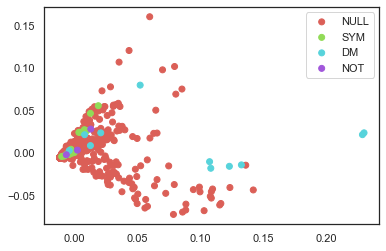

In [9]:
# write a function to plot the PCA using path count, DWPC, or both
# allow coloring by drug status or trial count (see compound_category_and_trial_count_df)
pca = PCA(n_components=2)
plot_pca_or_tsne(dwpc_pivot, compound_category_and_trial_count_df, 'Cat', pca)


In [10]:
# Find the explained variance


PC1: 0.34 PC2: 0.19


In [11]:
# Find the components for each meta-paths (note: here we are using the abs of the components)
component_df.sort_values(['PC1', 'PC2'], ascending=False).head()

,PC1,PC2
CrCrCtD,0.534871,0.463623
CuGuCtD,0.373820,0.120677
CdGdCtD,0.358734,0.141259
CiPCiCtD,0.319097,0.152431
CcSEcCtD,0.314782,0.170656


Top Compounds


,Compound,Meta_Path,Path_Count,DWPC,Name,Cat,Trials
1258,DB01234,CuGuCtD,270.0,0.149015,Dexamethasone,DM,1.0
318,DB00443,CuGuCtD,270.0,0.149015,Betamethasone,DM,0.0
321,DB01222,CuGuCtD,171.0,0.067881,Budesonide,NULL,0.0
1438,DB01177,CuGuCtD,209.0,0.064797,Idarubicin,NULL,0.0
1380,DB00997,CuGuCtD,191.0,0.060887,Doxorubicin,NULL,0.0


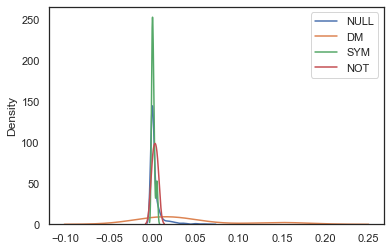

In [12]:
# Look at the distributions of different meta paths.
# Do the disease-modifying comp separate from the rest?


In [13]:
# After you find meta-paths with good separation, look at the top hits in Neo4j
# Write a function to create a Cyper query that will show you the meta paths between the disease and compound
get_cyper_query(query_df, compound = 'DB01234', meta_path='CuGuCtD')

MATCH path=(c:Compound)-[:UPREGULATES_CuG]-(:Gene)-[:UPREGULATES_CuG]-(:Compound)-[:TREATS_CtD]-(d:Disease) WHERE c.identifier="DB01234" AND d.identifier="DOID:2377" RETURN path LIMIT 5


In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
# This is the output of the above query in Neo4j
Image(url= "ms_example_output.png")

In [15]:
# Once you have a good Disease-Compound pair..
# check how it did & look at top 10 paths 
compound = 'DB01234'
print('https://neo4j.het.io/browser/?cmd=play&arg=https://neo4j.het.io/guides/rep/%s/%s.html' % (compound, '_'.join(DISEASE.split(':'))))

https://neo4j.het.io/browser/?cmd=play&arg=https://neo4j.het.io/guides/rep/DB01234/DOID_2377.html


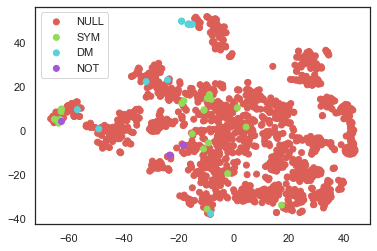

In [16]:
# Plot the results using TSNE (code will be similar to PCA)
tsne = TSNE(n_components=2)
